<a href="https://colab.research.google.com/github/alexiadouathanasia/task4_Athanasia/blob/main/Assignment_mod_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# we mount our google drive space
#from google.colab import drive
#drive.mount('/content/drive')

Model 1 - DecissionTree with outlier treatment

In [2]:
# STEP 1: Setup and import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [3]:
# STEP 2: Load the data
dataset = pd.read_csv("Churn_Banking_Modeling_ENG.csv")

In [4]:
dataset

,customer_id,flag_request_closure,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,str_prov_domicile,str_prov_residence,num_year_first_account,str_profession,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,2,no,65.03,0,0,38.0,BO,BO,2004.0,Impiegato,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,3,no,138.88,0,0,45.0,SA,SA,2000.0,Impiegato,...,11918.26,NaN,34916.15,26122.17,NaN,22053.82,0,0,0,0
2,4,no,546.54,0,0,61.0,VT,VT,2005.0,Altro/Nessuno,...,2671.95,NaN,232776.62,16545.25,NaN,216304.33,1,0,0,0
3,5,no,68.69,0,0,33.0,MI,MI,2010.0,Impiegato,...,19211.31,15013.53,15017.53,12500.00,NaN,NaN,0,0,0,0
4,7,no,2417.05,0,0,36.0,MI,MI,2001.0,Quadro,...,1526.38,NaN,NaN,1427.70,NaN,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,555146,no,5317.47,1,0,49.0,NaN,NaN,2008.0,Avvocato,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,555147,no,17.35,0,0,42.0,CT,CT,2002.0,Docente/Insegnante,...,-909.87,NaN,NaN,-2782.54,NaN,1098.68,0,0,0,0
377366,555148,no,334.73,0,0,54.0,RM,BZ,2001.0,Medico/Farmacista,...,72535.85,NaN,15017.53,66142.32,NaN,15208.61,0,0,0,0
377367,555149,no,5171.38,0,0,60.0,GE,GE,2007.0,Libero professionista/Titolare di impresa,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


In [5]:
# the target variable is key for our analysis
dataset = dataset.rename(columns={'flag_request_closure': 'Target'})

In [6]:
# We want the target variable values to be either 0 or 1
# that helps during model training and evaluation
# so we recode target variable
# here the details about the replace method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
dataset.replace({'Target':{"si":1}},inplace=True)
dataset.replace({'Target':{"no":0}},inplace=True)

C:\Users\rtira\AppData\Local\Temp\ipykernel_10556\3960407272.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Target':{"no":0}},inplace=True)


In [7]:
# we have a look at the variable names
dataset

,customer_id,Target,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,str_prov_domicile,str_prov_residence,num_year_first_account,str_profession,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,2,0,65.03,0,0,38.0,BO,BO,2004.0,Impiegato,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,3,0,138.88,0,0,45.0,SA,SA,2000.0,Impiegato,...,11918.26,NaN,34916.15,26122.17,NaN,22053.82,0,0,0,0
2,4,0,546.54,0,0,61.0,VT,VT,2005.0,Altro/Nessuno,...,2671.95,NaN,232776.62,16545.25,NaN,216304.33,1,0,0,0
3,5,0,68.69,0,0,33.0,MI,MI,2010.0,Impiegato,...,19211.31,15013.53,15017.53,12500.00,NaN,NaN,0,0,0,0
4,7,0,2417.05,0,0,36.0,MI,MI,2001.0,Quadro,...,1526.38,NaN,NaN,1427.70,NaN,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,555146,0,5317.47,1,0,49.0,NaN,NaN,2008.0,Avvocato,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,555147,0,17.35,0,0,42.0,CT,CT,2002.0,Docente/Insegnante,...,-909.87,NaN,NaN,-2782.54,NaN,1098.68,0,0,0,0
377366,555148,0,334.73,0,0,54.0,RM,BZ,2001.0,Medico/Farmacista,...,72535.85,NaN,15017.53,66142.32,NaN,15208.61,0,0,0,0
377367,555149,0,5171.38,0,0,60.0,GE,GE,2007.0,Libero professionista/Titolare di impresa,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


In [8]:
# STEP 3: Select variables used in the model
var_to_use = [
    'Target', 'amt_cust_value', 'flag_online_acc_opening', 'flag_mult_account_ownership',
    'num_age', 'num_year_first_account', 'amt_pricing_fee', 'amt_transfer_vs_competitors',
    'amt_tranfers_vs_no_competitors', 'num_existing_services', 'flag_salary_deposit',
    'amt_credit_card_spending', 'amt_debit_card_spending', 'num_website_access_count',
    'num_transactions_count', 'num_trading_activities_count', 'str_change_num_utilities',
    'flag_mortgage', 'flag_loan', 'flag_internal_tranfers', 'flag_request_info_closure',
    'flag_loyalty_program_enrol', 'flag_call_center_contact', 'flag_salary_deposit_variation',
    'num_loyalty_points', 'amt_current_liquidity', 'amt_current_managed', 'amt_current_administered',
    'amt_6m_current_liquidity', 'amt_6m_current_managed', 'amt_6m_current_administered',
    'flag_outgoing_sec_tranfer', 'flag_card_rejection', 'flag_loan_rejection', 'flag_deactivation_rid'
]


In [9]:
# i like to create list with all feature names (all variables except target)
# that may be useful later in constructing training datasets
features_names =  var_to_use.copy()
features_names.remove('Target')


In [10]:
# i remove all the variables that won't be used
dataset = dataset[var_to_use].copy()


In [11]:
# STEP 4: Outlier treatment (cap numeric variables at 1st and 99th percentiles)
numeric_vars = dataset.select_dtypes(include=np.number).columns.drop('Target')  # Assuming 'Target' is the label column
for col in numeric_vars:
    lower = dataset[col].quantile(0.01)
    upper = dataset[col].quantile(0.99)
    dataset[col] = np.clip(dataset[col], lower, upper)


In [12]:
# STEP 5: Train/test split
X = dataset.drop("Target", axis=1)  # Replace 'data' with 'dataset'
y = dataset["Target"]  # Replace 'data' with 'dataset'
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [13]:
# STEP 6: Fit Decision Tree model
model1 = DecisionTreeClassifier(max_depth=6, random_state=42)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [14]:
# STEP 7: Get probabilities for churn (class 1)
y_probs = model1.predict_proba(X_test)[:, 1]

In [15]:
# STEP 8: Precision@Top3000
# Get top 3000 customers with highest predicted churn probability
top_3000_idx = np.argsort(y_probs)[-3000:]
y_top_3000 = y_test.iloc[top_3000_idx]
precision_top_3000 = precision_score(y_top_3000, [1]*len(y_top_3000))

print("Precision on top 3000 customers (Model 1 - Decision Tree with outlier treatment):", precision_top_3000)

Precision on top 3000 customers (Model 1 - Decision Tree with outlier treatment): 0.05


Model 2 - RnadomForest Model

In [16]:
# STEP 1: Setup and import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [17]:
# STEP 2: Load the data
dataset = pd.read_csv("Churn_Banking_Modeling_ENG.csv")

In [18]:
dataset

,customer_id,flag_request_closure,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,str_prov_domicile,str_prov_residence,num_year_first_account,str_profession,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,2,no,65.03,0,0,38.0,BO,BO,2004.0,Impiegato,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,3,no,138.88,0,0,45.0,SA,SA,2000.0,Impiegato,...,11918.26,NaN,34916.15,26122.17,NaN,22053.82,0,0,0,0
2,4,no,546.54,0,0,61.0,VT,VT,2005.0,Altro/Nessuno,...,2671.95,NaN,232776.62,16545.25,NaN,216304.33,1,0,0,0
3,5,no,68.69,0,0,33.0,MI,MI,2010.0,Impiegato,...,19211.31,15013.53,15017.53,12500.00,NaN,NaN,0,0,0,0
4,7,no,2417.05,0,0,36.0,MI,MI,2001.0,Quadro,...,1526.38,NaN,NaN,1427.70,NaN,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,555146,no,5317.47,1,0,49.0,NaN,NaN,2008.0,Avvocato,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,555147,no,17.35,0,0,42.0,CT,CT,2002.0,Docente/Insegnante,...,-909.87,NaN,NaN,-2782.54,NaN,1098.68,0,0,0,0
377366,555148,no,334.73,0,0,54.0,RM,BZ,2001.0,Medico/Farmacista,...,72535.85,NaN,15017.53,66142.32,NaN,15208.61,0,0,0,0
377367,555149,no,5171.38,0,0,60.0,GE,GE,2007.0,Libero professionista/Titolare di impresa,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


In [20]:
dataset = dataset.rename(columns={'flag_request_closure': 'Target'})

In [22]:
dataset.replace({'Target': {"si": 1, "no": 0}}, inplace=True)

C:\Users\rtira\AppData\Local\Temp\ipykernel_10556\2789666159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Target': {"si": 1, "no": 0}}, inplace=True)


In [23]:
var_to_use = [
    'Target', 'amt_cust_value', 'flag_online_acc_opening', 'flag_mult_account_ownership',
    'num_age', 'num_year_first_account', 'amt_pricing_fee', 'amt_transfer_vs_competitors',
    'amt_tranfers_vs_no_competitors', 'num_existing_services', 'flag_salary_deposit',
    'amt_credit_card_spending', 'amt_debit_card_spending', 'num_website_access_count',
    'num_transactions_count', 'num_trading_activities_count', 'str_change_num_utilities',
    'flag_mortgage', 'flag_loan', 'flag_internal_tranfers', 'flag_request_info_closure',
    'flag_loyalty_program_enrol', 'flag_call_center_contact', 'flag_salary_deposit_variation',
    'num_loyalty_points', 'amt_current_liquidity', 'amt_current_managed', 'amt_current_administered',
    'amt_6m_current_liquidity', 'amt_6m_current_managed', 'amt_6m_current_administered',
    'flag_outgoing_sec_tranfer', 'flag_card_rejection', 'flag_loan_rejection', 'flag_deactivation_rid'
]

# Subset the dataset to only selected variables
dataset = dataset[var_to_use].copy()

In [24]:
X = dataset.drop('Target', axis=1)  # Features (all columns except 'Target')
y = dataset['Target']  # Target variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [26]:
# STEP 1: Initialize the Random Forest model
model2 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)

# STEP 2: Fit the model
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [27]:
# Get probabilities for churn (class 1)
y_probs_rf = model2.predict_proba(X_test)[:, 1]

In [28]:
# STEP 3: Precision@Top3000
top_3000_idx_rf = np.argsort(y_probs_rf)[-3000:]  # Get top 3000 customers with highest predicted churn probability
y_top_3000_rf = y_test.iloc[top_3000_idx_rf]  # Corresponding actual values for these customers

# Calculate precision
precision_top_3000_rf = precision_score(y_top_3000_rf, [1]*len(y_top_3000_rf))  # Compare with 1 as all should be churn (class 1)

# Print precision
print("Precision on top 3000 customers (Random Forest):", precision_top_3000_rf)

Precision on top 3000 customers (Random Forest): 0.08133333333333333


Model 3 - RandonForest and Normalization of the data

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [31]:
dataset = pd.read_csv("Churn_Banking_Modeling_ENG.csv")

# Rename the target column
dataset = dataset.rename(columns={'flag_request_closure': 'Target'})

# Replace target values with 1 and 0
dataset.replace({'Target': {"si": 1, "no": 0}}, inplace=True)

# Define the variables to use
var_to_use = [
    'Target', 'amt_cust_value', 'flag_online_acc_opening', 'flag_mult_account_ownership',
    'num_age', 'num_year_first_account', 'amt_pricing_fee', 'amt_transfer_vs_competitors',
    'amt_tranfers_vs_no_competitors', 'num_existing_services', 'flag_salary_deposit',
    'amt_credit_card_spending', 'amt_debit_card_spending', 'num_website_access_count',
    'num_transactions_count', 'num_trading_activities_count', 'str_change_num_utilities',
    'flag_mortgage', 'flag_loan', 'flag_internal_tranfers', 'flag_request_info_closure',
    'flag_loyalty_program_enrol', 'flag_call_center_contact', 'flag_salary_deposit_variation',
    'num_loyalty_points', 'amt_current_liquidity', 'amt_current_managed', 'amt_current_administered',
    'amt_6m_current_liquidity', 'amt_6m_current_managed', 'amt_6m_current_administered',
    'flag_outgoing_sec_tranfer', 'flag_card_rejection', 'flag_loan_rejection', 'flag_deactivation_rid'
]

# Subset the dataset to only selected variables
dataset2 = dataset[var_to_use].copy()

# Split into features (X) and target (y)
X = dataset2.drop('Target', axis=1)
y = dataset2['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

C:\Users\rtira\AppData\Local\Temp\ipykernel_10556\1868004357.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Target': {"si": 1, "no": 0}}, inplace=True)


In [32]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['str_prov_domicile']),  # Encoding categorical variable
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Normalize numerical features
        ]), X.columns.difference(['str_prov_domicile']))  # Apply to numerical columns
    ]
)

In [33]:

model3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)

model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [34]:
# Get probabilities for churn (class 1)
y_probs_rf = model3.predict_proba(X_test)[:, 1]

In [35]:
# STEP 3: Precision@Top3000
top_3000_idx_rf = np.argsort(y_probs_rf)[-3000:]  # Get top 3000 customers with highest predicted churn probability
y_top_3000_rf = y_test.iloc[top_3000_idx_rf]  # Corresponding actual values for these customers

# Calculate precision
precision_top_3000_rf2 = precision_score(y_top_3000_rf, [1]*len(y_top_3000_rf))  # Compare with 1 as all should be churn (class 1)

# Print precision
print("Precision on top 3000 customers (Random Forest):", precision_top_3000_rf2)

Precision on top 3000 customers (Random Forest): 0.08133333333333333


Comparisson of the 3 Models

Model Comparison - Precision on Top 3000 Predicted Churners:
1. Decision Tree (Outlier Treatment): 0.045
2. Random Forest: 0.0813
3. Random Forest + Normalization: 0.0813


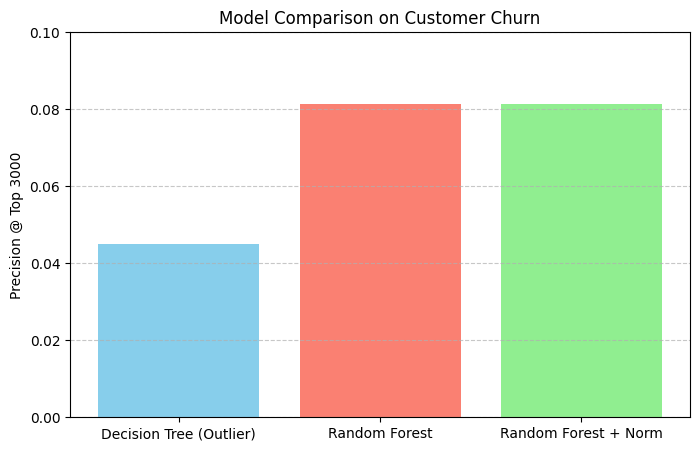

In [36]:
# Precision values from your models
precision_top_3000 = 0.045
precision_top_3000_rf = 0.0813
precision_top_3000_rf2 = 0.0813

# Print the comparison
print("Model Comparison - Precision on Top 3000 Predicted Churners:")
print("1. Decision Tree (Outlier Treatment):", precision_top_3000)
print("2. Random Forest:", precision_top_3000_rf)
print("3. Random Forest + Normalization:", precision_top_3000_rf2)

# Bar plot for visualization
import matplotlib.pyplot as plt

model_names = ['Decision Tree (Outlier)', 'Random Forest', 'Random Forest + Norm']
precision_scores = [precision_top_3000, precision_top_3000_rf, precision_top_3000_rf2]

plt.figure(figsize=(8, 5))
plt.bar(model_names, precision_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Precision @ Top 3000')
plt.title('Model Comparison on Customer Churn')
plt.ylim(0, 0.1)  # Adjusted since your scores are small
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()